In [1]:
! pip install --upgrade "kaleido==0.1.*"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime
import plotly.express as px
import plotly.graph_objects as go
import missingno as msno
import kaleido
warnings.filterwarnings('ignore')

%matplotlib inline

# Load and Describe Data

---------

## Load Data

Dataset yang kita gunakan adalah "Used Car Auction Prices" yang berasal dari Kaggle

In [3]:
dfcar = pd.read_csv('car_prices.csv', on_bad_lines="skip")
dfcar.sample(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
540465,2008,Mercury,Milan,Premier,sedan,automatic,3mehm08zx8r617183,md,2.3,92353.0,gray,black,credit acceptance corp/vrs/southfield,5000,4800,Tue Jun 16 2015 02:30:00 GMT-0700 (PDT)
190574,2011,Hyundai,Sonata,SE,Sedan,NaN,5npec4ac6bh160290,pa,1.9,35759.0,gray,gray,hyundai motor finance,12250,10500,Fri Feb 13 2015 01:00:00 GMT-0800 (PST)
353270,2014,Chevrolet,Sonic,LT,Sedan,automatic,1g1jc5sh7e4112623,mi,4.1,45006.0,silver,black,avis corporation,9750,10000,Thu Feb 26 2015 02:15:00 GMT-0800 (PST)
271888,2014,Kia,Optima,LX,Sedan,automatic,5xxgm4a77eg344453,oh,5.0,10263.0,burgundy,beige,"kia motors america, inc",15800,15100,Tue Feb 17 2015 01:30:00 GMT-0800 (PST)
541869,2004,Ford,Explorer,XLT,suv,NaN,1fmzu63kx4ub57461,tx,2.9,130606.0,blue,gray,dt credit corporation,2600,3300,Tue Jun 16 2015 04:00:00 GMT-0700 (PDT)


#### List fitur pada dataset adalah sebagai berikut :

1. Year : Tanggal produksi dari mobil.
2. Make : Merk dari mobil.
3. Model : Edisi dari tiap merk mobil.
4. Trim : Versi trim dari mobil.
5. Body : Tipe bentuk dari mobil.
6. Transmission : Transmisi yang digunakan pada mobil.
7. VIN : Vehicle Identification Number.
8. State : Negara bagian tempat mobil dijual.
9. Condition : Kondisi dari mobil pada saat dijual.
10. Odometer : Jarak tempuh mobil semenjak tanggal manufacture.
11. Color : Warna eksterior dari mobil.
12. Interior : Warna interior dari mobil.
13. Seller : Penjual dari mobil (Car dealers).
14. **MMR : Manhiem Market Record, market yang memprediksi harga mobil.**
15. Sellingprice : Nilai jual mobil.
16. Saledate : Tanggal mobil dijual.

## Data Exploration

In [4]:
dfcar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


1. Total dari data ada 558811 entries
2. Tipe dari data int, float dan object, dan terlihat sudah sesuai dengan kolomnya. Namun, untuk kolom 'saledate' tipe data yang awalnya 'object', dirasa perlu diubah ke date time.
3. Terdapat nilai Null pada beberapa fitur

In [5]:
# Mengecek null value
dfcar.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65353
vin                 0
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

Terdapat 9 fitur yang memiliki Null value, yaitu make, model, trim, body, transmission, condition, odometer, color, interior. Perlu diadakan tindak lanjut di Data Cleaning

In [6]:
# Mengecek duplicated rows
dfcar.duplicated().sum()

0

Dataset tidak memiliki data duplikat sehingga tidak diperlukan penanganan.

In [7]:
# Mengkategorikan fitur sesuai dari tipe data
num = ['year', 'condition', 'odometer', 'mmr', 'sellingprice']
cat = ['make', 'model', 'trim', 'body', 'transmission', 'vin', 'state', 'color', 'interior', 'seller', 'saledate']

# Membatasi angka setelah koma hingga hanya 3 angka
pd.set_option('display.float_format', lambda x: '%.3f' % x)

dfcar[num].describe()

,year,condition,odometer,mmr,sellingprice
count,558811.000,547017.000,558717.000,558811.000,558811.000
mean,2010.039,3.425,68323.196,13769.325,13611.262
std,3.967,0.949,53397.753,9679.875,9749.657
min,1982.000,1.000,1.000,25.000,1.000
25%,2007.000,2.700,28374.000,7100.000,6900.000
50%,2012.000,3.600,52256.000,12250.000,12100.000
75%,2013.000,4.200,99112.000,18300.000,18200.000
max,2015.000,5.000,999999.000,182000.000,230000.000


1. Condition memiliki value antara 1-5.
2. Nilai dari odometer terlihat memiliki jarak yang jauh antara min dan max dimana nilai min nya adalah 1 dan max nya hampir 1 juta. Tentu ini adalah hal yang terkesan janggal. Selain itu, nilai mean dan median nya juga terhitung sangat jauh yaitu 16000.
3. Secara keseluruhan, nilai MMR dan sellingprice tidak terlalu berbeda. Namun, nilai min-max dan mean-median nya sangat jauh, sehingga perlu diperhatikan lebih lanjut untuk tahap berikutnya.
4. Beberapa kolom di fitur numerical juga terdapat null value, sehingga perlu ditangani pada tahap berikutnya.

In [8]:
dfcar[cat].describe()

,make,model,trim,body,transmission,vin,state,color,interior,seller,saledate
count,548510,548412,548160,545616,493458,558811,558811,558062,558062,558811,558811
unique,96,973,1975,86,2,550296,38,20,17,14264,3745
top,Ford,Altima,Base,Sedan,automatic,wbanv13588cz57827,fl,black,black,nissan-infiniti lt,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,93554,19349,55817,199437,475914,5,82945,110970,244325,19693,5334


1. Dari data diatas, kita bisa melihat secara sekilas nilai apa yang paling teratas, sering muncul, dan berapa jumlah unique value dari masing-masing fitur.
2. Sebagai contoh, Ford merupakan brand yang paling populer diantara 96 total brand lain. Selain itu, mobil tipe sedan juga termasuk yang paling favorit.
3. Transmisi automatic lebih dicari customer dibanding manual dengan jumlah lebih dari 90%.
4. Warna hitam tetap mendominasi baik di eksterior maupun interior.
5. Untuk hasil 'first' dan 'last' hanya berlaku terhadap data date, sehingga tidak heran jika kolom yang lain dikatakan null value secara keseluruhan

----------

# EDA (Exploratory Data Analysis)

-------

## UNIVARIATE ANALYSIS 

Pada tahap EDA, kita akan menganalisis baik analisis univariate ataupun multivariate. Pada univariate analysis, kami menganalisis fitur-fitur yang sekiranya memberikan dampak besar terhadap harga jual mobil. Tak hanya itu, kami juga memvisualisasikan bagaimana persebaran data pada dataset baik ditinjau dari outliers, skewness, null value, dll.

### Unique Value From Some Features

In [9]:
dfcar['year'].unique()

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003, 2002, 2001, 2000, 1999, 1998, 1995, 1996, 1997, 1987,
       1994, 1993, 1992, 1989, 1991, 1990, 1986, 1985, 1988, 1984, 1982,
       1983], dtype=int64)

Semua value sudah sesuai, yaitu berupa angka yang dimulai dari tahun 1983 hingga 2015

In [10]:
dfcar['make'].unique()

array(['Kia', 'BMW', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Hyundai', 'Buick', 'Cadillac', 'Acura', 'Lexus', 'Infiniti',
       'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Mazda', 'MINI',
       'Land Rover', 'Lincoln', 'lincoln', 'Jaguar', 'Volkswagen',
       'Toyota', 'Subaru', 'Scion', 'Porsche', nan, 'bmw', 'Dodge',
       'FIAT', 'Chrysler', 'ford', 'Ferrari', 'Honda', 'GMC',
       'mitsubishi', 'Ram', 'smart', 'chevrolet', 'Bentley', 'chrysler',
       'pontiac', 'Pontiac', 'Saturn', 'Maserati', 'Mercury', 'HUMMER',
       'landrover', 'cadillac', 'land rover', 'mercedes', 'mazda',
       'toyota', 'lexus', 'gmc truck', 'honda', 'nissan', 'porsche',
       'Saab', 'Suzuki', 'dodge', 'subaru', 'Oldsmobile', 'oldsmobile',
       'hyundai', 'jeep', 'Isuzu', 'dodge tk', 'Geo', 'acura',
       'volkswagen', 'suzuki', 'kia', 'audi', 'Rolls-Royce', 'gmc',
       'maserati', 'mazda tk', 'mercury', 'buick', 'hyundai tk',
       'mercedes-b', 'vw', 'Daewoo', 'chev truck', 'f

Terdapat null value pada fitur 'make'.
Value dari kolom 'make' masih terlalu beragam dimana terdapat kata yang huruf awal kapital, kata yang berisi kapital semua, kata yang berisi lower case semua. Oleh karena itu, kita akan mengubah value nya menjadi lower case semua di tahap berikutnya. 

In [11]:
dfcar['transmission'].unique()

array(['automatic', nan, 'manual'], dtype=object)

Seperti yang kita tahu terdapat 2 jenis transmisi, yaitu manual dan automatic. Namun, terdapat value 'NaN' di dalam kolom 'transmission' sehingga perlu dijadikan catatan untuk tahap selanjutnya.

In [12]:
dfcar['condition'].unique()

array([5. , 4.5, 4.1, 4.3, 1. , 3.4, 2. , 4.2, 3. , 4.8, nan, 4.9, 1.7,
       1.9, 2.9, 3.8, 4.4, 4.7, 3.2, 4. , 2.5, 3.7, 3.9, 3.1, 2.8, 4.6,
       3.6, 3.5, 2.6, 2.1, 2.2, 2.7, 2.4, 3.3, 2.3, 1.5, 1.6, 1.8, 1.2,
       1.4, 1.1, 1.3])

Untuk kondisi mobil bervariasi dari 1 sampai 5, serta terdapat null value.

In [13]:
dfcar['state'].unique()

array(['ca', 'tx', 'pa', 'mn', 'az', 'wi', 'tn', 'md', 'fl', 'ne', 'nj',
       'nv', 'oh', 'mi', 'ga', 'va', 'sc', 'nc', 'in', 'il', 'co', 'ut',
       'mo', 'ny', 'ma', 'pr', 'or', 'la', 'wa', 'hi', 'qc', 'ab', 'on',
       'ok', 'ms', 'nm', 'al', 'ns'], dtype=object)

Semua value di kolom 'state' sudah sesuai. Tidak ada null value, namun kita bisa mengubah nya menjadi upper case seperti lazimnya kode wilayah yang menggunakan kapital. 

### Outlier Numerik (year, condition, odometer, MMR, sellingprice)

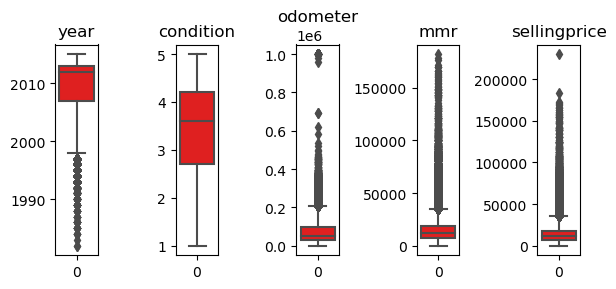

In [14]:
# Melihat penampilan outlier

plt.figure(figsize=(6, 3))
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.boxplot(dfcar[num[i]], color='red', orient='v')
    plt.title(num[i])
    plt.tight_layout()

Dapat dilihat bahwa mmr dan selling price memiliki outlier paling banyak, begitu juga dengan kolom odometer dan year. Untuk kuartil dan mediannya pun juga terkesan jauh. Hal ini dapat terjadi karena banyaknya data mobil (500k++) sehingga nilai mmr dan selling price mapun odometer juga sangat bervariasi. Kolom yang terlihat paling normal hanyalah kolom 'condition'. Hasil analisis ini merupakan bentuk visual dari statistik data yang telah kita lakukan sebelumnya pada tahap Data Exploration.

### Distribusi Data (year, condition, odometer, MMR, sellingprice)

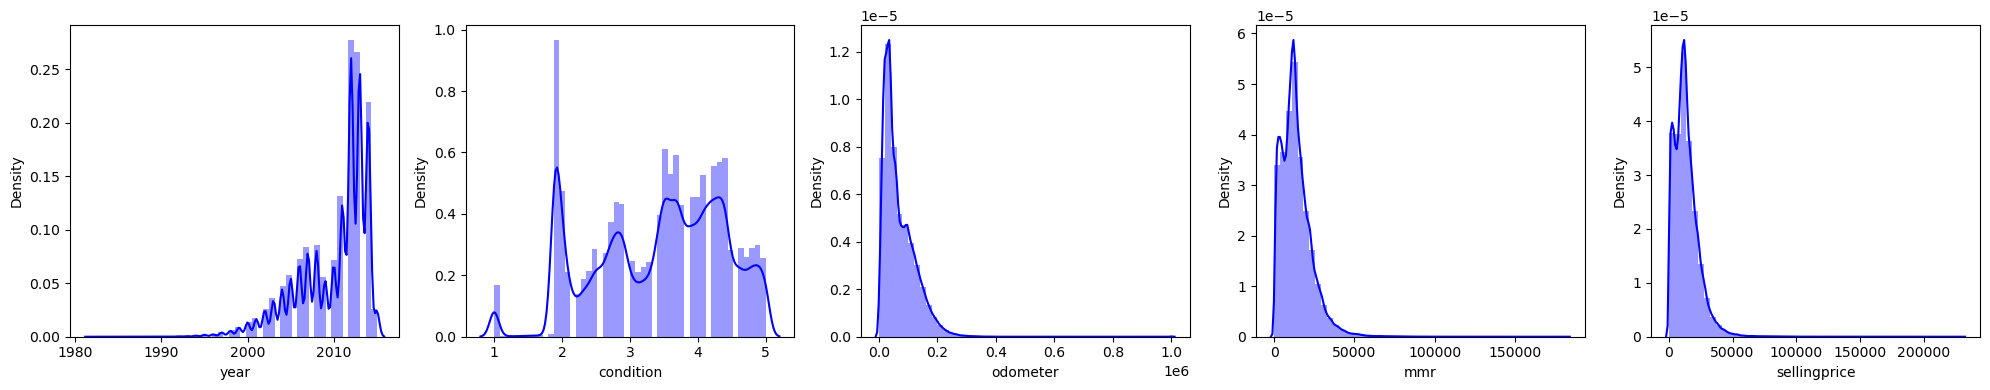

In [15]:
# Melihat grafik distribusi

plt.figure(figsize=(20, 4))
for i in range(0, len(num)):
    plt.subplot(1, 5, i+1)
    sns.distplot(dfcar[num[i]], color='blue')
    plt.tight_layout()

Dari grafik diatas dapat terlihat :
1. Dari kolom 'year' kita bisa melihat bahwa penjualan cenderung mengalami peningkatan pada setiap tahunnya dan puncak penjualan berada di antara tahun 2010 hingga 2015. Kita juga bisa melihat bahwa kolom 'year' termasuk left-skewed.
2. Pada grafik 'condition', kondisi mobil yang berada di kisaran angka 2 menjadi mayoritas dari kondisi lainnya. Hal ini menunjukkan bahwa kondisi mobil bekas bernilai kurang baik. Namun, tidak sedikit juga kondisi mobil yang bernilai 3 keatas hingga 4. 
3. Untuk odometer dapat terlihat bahwa mayoritas berada di angka 0 hingga 0.2 yang artinya odometer berkisar antara 0 hingga 200k. Sedangkan untuk pemakaian mobil diatas 200k terhitung jarang. 
4. Kolom 'mmr' dan 'sellingprice' terlihat serupa dimana harga jual mobil berkisar di angka 0-50000. 
5. Dari kolom-kolom diatas, kolom 'odometer', 'mmr', dan 'sellingprice' termasuk right-skewed.

### Visualize Null Values

<Axes: >

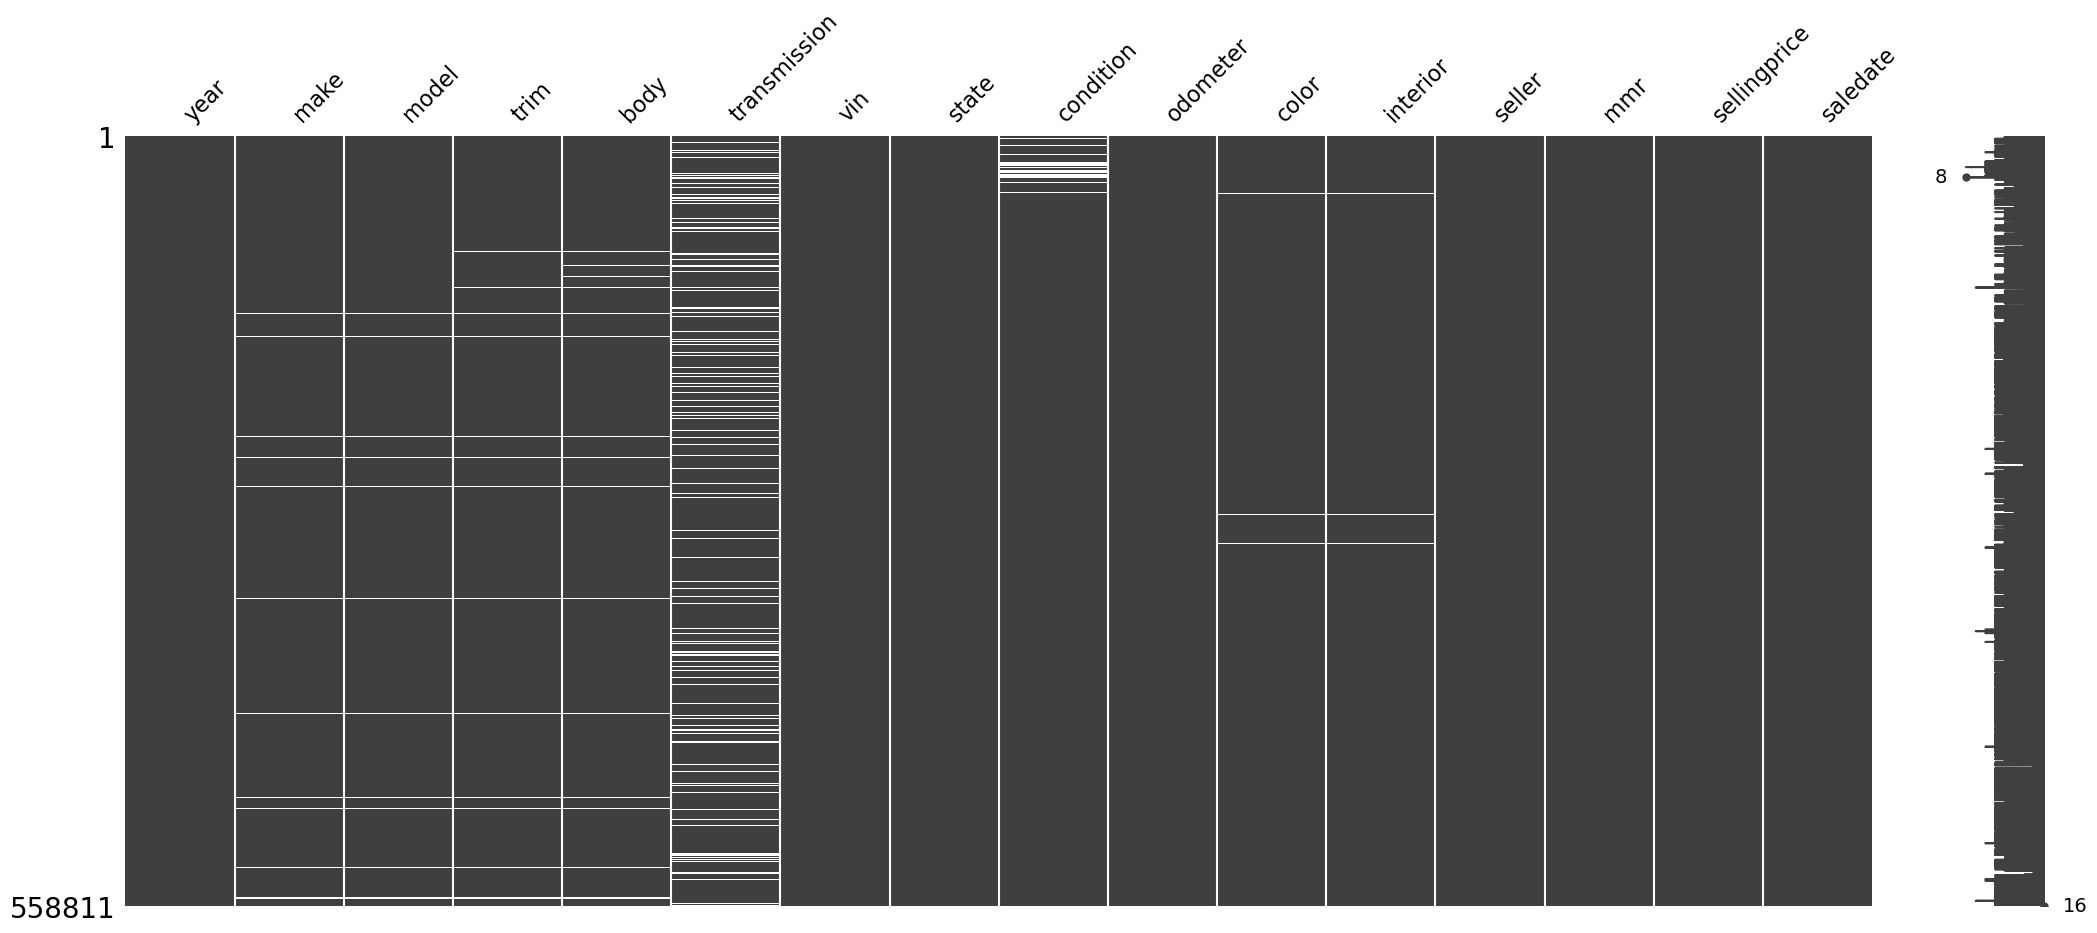

In [16]:
# Melihat null values dari keseluruhan dataset

msno.matrix(dfcar)

Pada matrix diatas kita dapat melihat kolom-kolom yang memiliki null value secara visual, yaitu kolom 'make', 'model', 'trim', 'body', 'transmission', 'condition', 'color', 'interior'. Sebenarnya kolom 'odometer' juga memiliki null value namun tidak terlihat karena jumlah null value yang dimiliki sangat sedikit, yaitu hanya 94 dari 500000++ data seperti yang terlihat pada saat Data Exploration sebelumnya.

### Check Nilai Min dan Max

Seperti analisis sebelumnya dimana kita menemukan nilai min dan max yang terkesan tidak masuk akal, maka kita akan mengecek lebih lanjut data yang mengandung nilai tersebut.  

Beberapa kolom tersebut adalah 'odometer', 'mmr', dan 'sellingprice'.

**1. Nilai min dan max dari kolom Odometer**

In [17]:
min_odo = dfcar[dfcar['odometer'] == 1.000]
min_odo

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
697,2013,Nissan,Maxima,3.5 S,Sedan,automatic,1n4aa5apxdc839917,ca,1.000,1.000,gray,black,enterprise vehicle exchange / tra / rental / t...,16950,1000,Tue Jan 13 2015 13:00:00 GMT-0800 (PST)
1000,2012,Chrysler,200,LX,Sedan,automatic,1c3ccbab7cn236141,ca,NaN,1.000,gray,black,santander consumer,10450,1300,Tue Dec 16 2014 13:00:00 GMT-0800 (PST)
1723,2012,Mercedes-Benz,M-Class,ML63 AMG,SUV,NaN,4jgda7eb0ca049551,ca,NaN,1.000,NaN,NaN,high bid trading co inc,69000,18500,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
2082,2011,NaN,NaN,NaN,NaN,automatic,1ftlr1fe5bpa06821,ca,NaN,1.000,white,—,onemain rem/e motorcars,18300,11500,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
2942,2009,Honda,Civic,LX,Sedan,automatic,2hgfa16579h341583,ca,3.000,1.000,silver,gray,"ahfc/honda lease trust/hvt, inc.",9325,1000,Tue Jun 30 2015 10:00:00 GMT-0700 (PDT)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551550,2002,Saturn,S-Series,SL2,Sedan,NaN,1g8zj54702z304849,wa,2.000,1.000,silver,black,donate for charity,1700,350,Wed Jun 17 2015 05:30:00 GMT-0700 (PDT)
551596,2000,Subaru,Outback,Limited,wagon,automatic,4s3bh6862y7671346,wa,2.000,1.000,black,gray,donate for charity,3025,1050,Wed Jun 17 2015 05:30:00 GMT-0700 (PDT)
553939,2012,Ford,Taurus,SE,sedan,automatic,1fahp2dw4cg130924,ca,3.300,1.000,red,beige,high performance capital,12650,3700,Wed Jun 24 2015 05:30:00 GMT-0700 (PDT)
557280,2001,Dodge,Ram Pickup 1500,ST,regular cab,automatic,1b7hc16x31s209808,ms,1.000,1.000,white,gray,select remarketing group llc/midwest title loans,1750,300,Thu Jun 18 2015 05:02:00 GMT-0700 (PDT)


In [18]:
max_odo = dfcar[dfcar['odometer'] == 999999.000]
max_odo

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
275,2013,Hyundai,Elantra Coupe,GS,Elantra Coupe,automatic,kmhdh6ae8du017422,ca,1.000,999999.000,blue,gray,hyundai motor finance,8025,2500,Tue Jan 27 2015 04:00:00 GMT-0800 (PST)
4626,2003,Chevrolet,Silverado 1500,LS,Extended Cab,automatic,1gcec19v43e225059,ca,2.000,999999.000,gray,gray,800 loan mart,1425,700,Tue Dec 16 2014 13:00:00 GMT-0800 (PST)
13317,2009,Chevrolet,Cobalt,LT,Coupe,automatic,1g1at18h797165360,tx,NaN,999999.000,white,gray,mei finance,3375,400,Thu Dec 18 2014 14:00:00 GMT-0800 (PST)
13480,2009,Dodge,Charger,Base,Sedan,automatic,2b3ka43d49h578284,il,1.000,999999.000,black,gray,santander consumer,3850,1700,Tue Dec 23 2014 13:00:00 GMT-0800 (PST)
13568,2009,Dodge,Charger,Base,Sedan,automatic,2b3ka43dx9h521300,tx,1.000,999999.000,blue,black,santander consumer,4150,5500,Thu Jan 08 2015 14:10:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489822,2008,Chrysler,300,Touring,sedan,automatic,2c3la53g88h288734,ca,2.700,999999.000,silver,beige,chrysler capital,4325,1200,Tue Jun 02 2015 06:00:00 GMT-0700 (PDT)
490450,2002,Ford,Expedition,Eddie Bauer,suv,automatic,1fmru17l72la49923,tx,2.000,999999.000,black,gray,titlemax/leon valley tx1,600,600,Wed Jun 03 2015 03:20:00 GMT-0700 (PDT)
501462,2011,Volkswagen,Jetta,SEL,sedan,NaN,3vwlx7aj1bm387406,tx,1.000,999999.000,white,tan,santander consumer,8600,1100,Wed Jun 03 2015 05:30:00 GMT-0700 (PDT)
513201,2006,Ford,Taurus,SEL,sedan,automatic,1fafp56u06a197709,oh,1.900,999999.000,gray,gray,car now acceptance co/columbus,175,400,Thu Jun 11 2015 02:00:00 GMT-0700 (PDT)


Dari data min dan max kolom 'odometer' diatas terlihat bahwa data tersebut tidak hanya mengandung nilai min dan max yang jauh tetapi pada kolom lain juga tidak normal. Hal tersebut bisa dilihat dari sample diatas dimana baris min dan max tersebut juga banyak mengandung null value, nilai mmr dan selling price yang rendah, dan kondisi yang tidak bagus. Tidak hanya itu, baris-baris ini juga terhitung banyak yaitu lebih dari 1000 data.

**2. Nilai Min Selling Price**

In [19]:
min_price = dfcar[dfcar['sellingprice'] == 1.000]
min_price

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
7566,2002,Ford,F-350 Super Duty,XLT,Crew Cab,NaN,1ftsw31f52ed16477,ca,2.000,NaN,white,gray,laa leasing,7850,1,Thu Feb 05 2015 04:00:00 GMT-0800 (PST)
48453,2003,Mercedes-Benz,E-Class,E500,Sedan,automatic,wdbuf70j73a269529,ga,2.100,1.000,black,black,peoples credit company inc,7325,1,Tue Jan 06 2015 09:30:00 GMT-0800 (PST)
293223,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew6eda13643,tx,4.100,31886.000,white,gray,u-haul,20800,1,Thu Feb 12 2015 03:00:00 GMT-0800 (PST)
348252,1995,Isuzu,Rodeo,LS,SUV,NaN,4s2cm58v9s4375559,va,1.000,254132.000,red,gray,automotive remarketing inc,375,1,Wed Mar 04 2015 01:05:00 GMT-0800 (PST)


Nilai min dari selling price yang bernilai 1, terdapat 4 data dari keseluruhan dataset. Hal ini juga perlu menjadi catatan dimana hal ini terkesan tidak masuk akal.

**3. Nilai Min dari MMR**

In [20]:
min_mmr = dfcar[dfcar['mmr'] == 25.000]
min_mmr.sample(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
29790,1997,Honda,Accord,LX,Sedan,manual,1hgcd553xva250995,fl,1.000,353083.000,black,gray,coggin honda of st. augustine,25,500,Thu Dec 18 2014 13:00:00 GMT-0800 (PST)
459976,1996,Nissan,Altima,GXE,Sedan,NaN,1n4bu31d7tc178674,fl,1.000,204494.000,turquoise,gray,autonation nissan kendall,25,350,Tue May 26 2015 11:05:00 GMT-0700 (PDT)
140359,2000,Chrysler,LHS,Base,Sedan,automatic,2c3hc56g3yh231210,nc,1.900,223937.000,blue,beige,hendrick motors of charlotte,25,650,Wed Jan 14 2015 06:30:00 GMT-0800 (PST)
167891,2000,Chrysler,Sebring,JXi,Convertible,NaN,3c3el55h5yt254833,mo,2.000,278597.000,white,—,the hertz corporation,25,175,Tue Feb 17 2015 03:00:00 GMT-0800 (PST)
196104,2004,Ford,F-150 Heritage,XL,Regular Cab,NaN,2ftrf17224ca37472,nc,3.000,265521.000,white,gray,crossroads ford of kernersville inc,25,1300,Mon Jan 26 2015 01:00:00 GMT-0800 (PST)


Dari data diatas dimana nilai mmr hanya 25, juga terdapat kejanggalan pada kolom yang lainnya. Yaitu, banyak terdapat null value, nilai sellingprice yang tergolong kecil, kondisi yang tidak bagus.

### Data Insight
Beberapa data insight lainnya yang didapat dari univariate analysis

In [21]:
# Mengelompokan berdasarkan make (merk atau brand)
top_make = dfcar.groupby('make').size().sort_values(ascending= False).reset_index(name='count')
top_make

,make,count
0,Ford,93554
1,Chevrolet,60197
2,Nissan,53946
3,Toyota,39871
4,Dodge,30710
...,...,...
91,chev truck,1
92,ford tk,1
93,airstream,1
94,hyundai tk,1


Terlihat bahwa merk mobil paling favorit adalah Ford, lalu selanjutnya disusul oleh Chevrolet, Nissan, Toyota, Dodge, dst. Yang uniknya adalah perbedaan mobil-mobil n-teratas dan n-terbawah sangatlah jauh dimana n-teratas menyentuh angka puluhan ribu sedangkan n-terbawah hanya 1 mobil.

In [22]:
# Mengelompokan berdasarkan model
top_model = dfcar.groupby('model').size().sort_values(ascending= False).reset_index(name='count')
top_model

,model,count
0,Altima,19349
1,F-150,14479
2,Fusion,12946
3,Camry,12545
4,Escape,11861
...,...,...
968,Paseo,1
969,Q3,1
970,Ram Van,1
971,Regency,1


Terlihat bahwa top model mobil bekas adalah Altima dan top 2 adalah F-150. Hal ini juga sama seperti analisis merk mobil sebelumnya dimana selisih n-teratas dan n-terbawah sangatlah jauh.

In [23]:
# Mengelompokan berdasarkan warna mobil dan warna interior
color = dfcar.groupby('color').size().sort_values(ascending= False).reset_index(name= 'count')
interior = dfcar.groupby('interior').size().sort_values(ascending= False).reset_index(name= 'count')

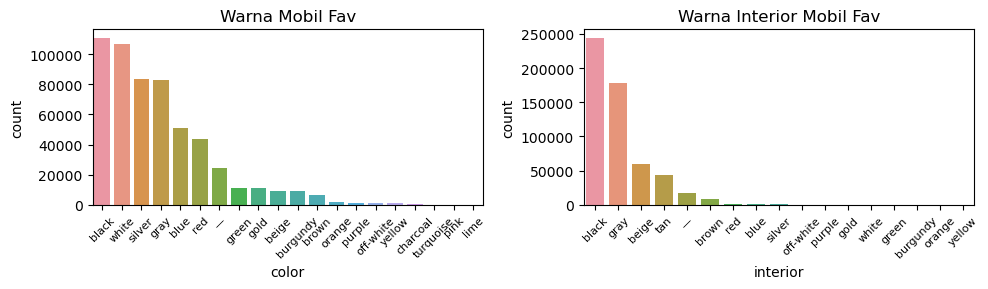

In [24]:
#visualisasi
plt.figure(figsize= (10, 3))

plt.subplot(1,2,1)
sns.barplot(data=color, x='color', y='count')
plt.title('Warna Mobil Fav')
plt.xticks(rotation= 45, size= 8)

plt.subplot(1,2,2)
sns.barplot(data=interior, x='interior', y='count')
plt.title('Warna Interior Mobil Fav')
plt.xticks(rotation= 45, size= 8)
plt.tight_layout()

Dapat terlihat bahwa :
1. Untuk warna mobil dan warna interior mobil paling disukai adalah warna hitam.
2. Terlihat juga bahwa warna interior mobil yang lazim digunakan adalah hitam, abu-abu, beige, dan tan.
3. Terdapat missing value ( - ) pada warna dan interior mobil sehingga perlu dilakukan penanganan pada tahap berikutnya.

## MULTIVARIATE ANALYSIS

**Melihat Korelasi Antar Fitur Numerik**

In [25]:
dfcar.corr()

,year,condition,odometer,mmr,sellingprice
year,1.000,0.551,-0.773,0.597,0.586
condition,0.551,1.000,-0.539,0.485,0.539
odometer,-0.773,-0.539,1.000,-0.588,-0.582
mmr,0.597,0.485,-0.588,1.000,0.984
sellingprice,0.586,0.539,-0.582,0.984,1.000


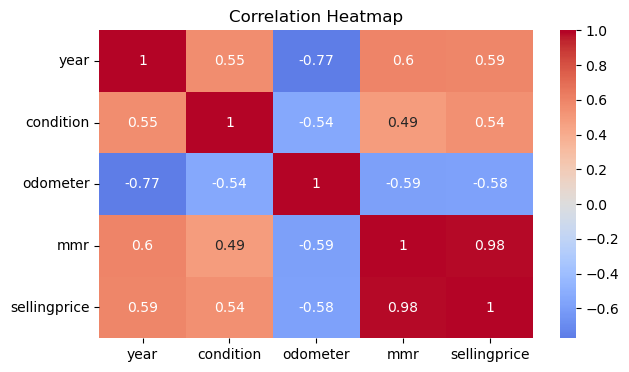

In [26]:
# Plot korelasi heatmap
corr_matrix = dfcar[num].corr()
plt.figure(figsize=(7, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

1. Korelasi antara 'year' dan 'sellingprice' adalah positif, menunjukkan bahwa semakin baru mobil, semakin tinggi harga jualnya.

2. Kolom 'condition' memiliki korelasi positif dengan 'sellingprice', yang berarti semakin baik kondisi mobil, semakin tinggi harga jualnya.

3. Kolom 'odometer' memiliki korelasi negatif dengan 'sellingprice', menunjukkan bahwa semakin sedikit jarak tempuh, semakin tinggi harga jualnya.

4. Kolom 'mmr' memiliki korelasi positif yang cukup kuat dengan 'sellingprice', menunjukkan bahwa harga jual yang diprediksi oleh MMR memiliki korelasi yang baik dengan harga jual aktual.  

5. Kolom ‘Year’ dan ‘Odometer’ juga menunjukkan korelasi negative yang cukup tinggi, artinya mobil keluaran terbaru memiliki odometer yang cenderung kecil

**Memvisualisasikan MMR dan Selling Price**

Seperti hasil analisis sebelumnya yang menunjukkan bahwa nilai MMR dan Selling Price memiliki kemiripan yang tinggi, maka kita akan coba memvisualisasikan bagaimana hubungan keduanya.

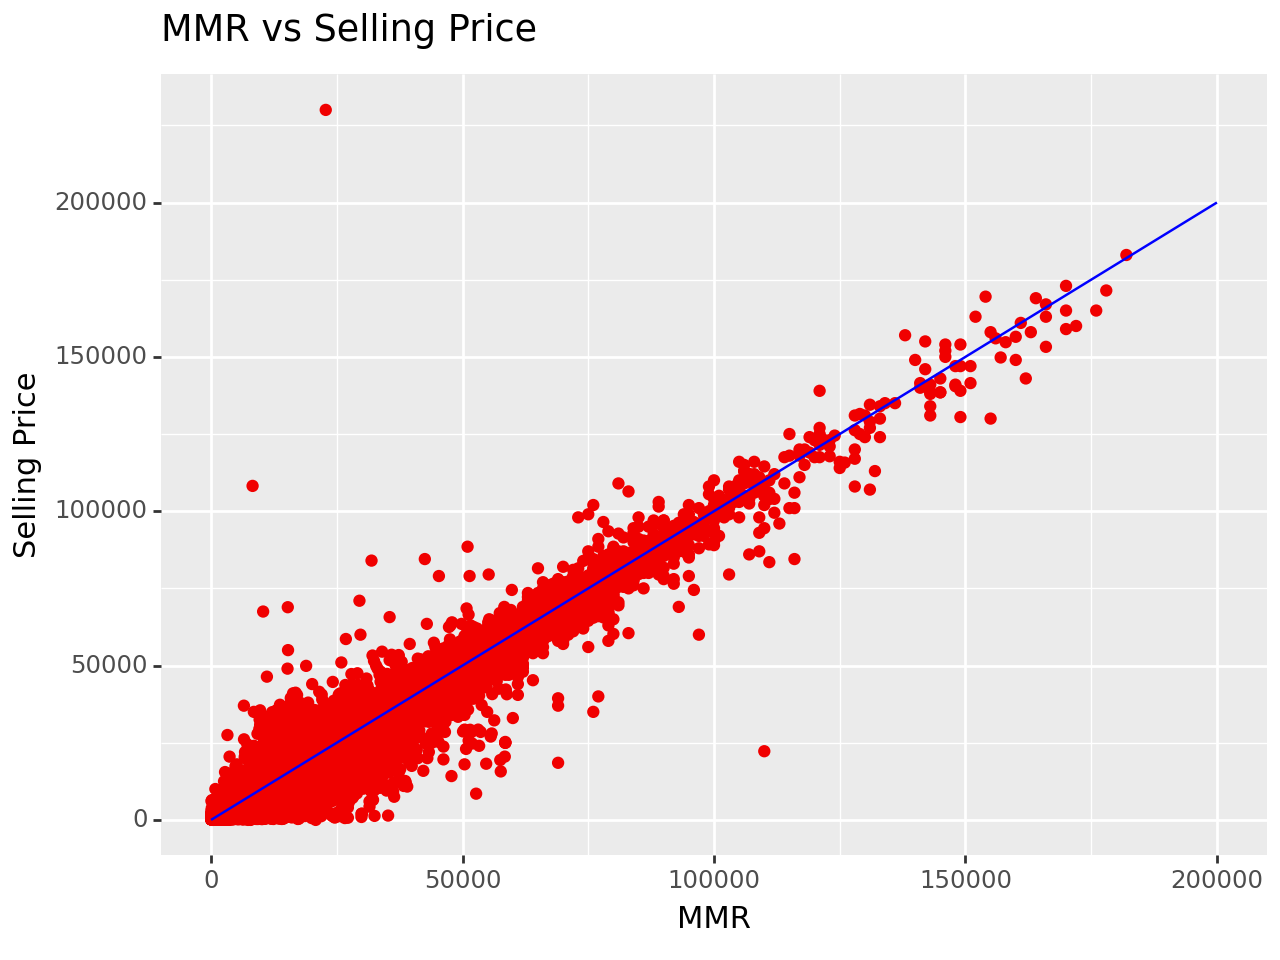

<Figure Size: (640 x 480)>

In [27]:
from plotnine import *

# Visualisasi MMR dan Selling Price
(ggplot(dfcar)
 + aes(x ='mmr', y ='sellingprice') 
 + geom_point(color='#f00000')
 + labs(title='MMR vs Selling Price', x='MMR', y='Selling Price')
 + annotate(geom = "segment", x = 0, xend = 200000, y = 0, yend = 200000, color='blue')
)

Grafik diatas menunjukkan bagaimana persebaran selling price terhadap MMR.  
MMR merupakan singkatan dari Manhiem Market Report yaitu sebuah spesific report yang menjadi indikator wholesale price untuk penjualan kendaraan. Perhitungan harga didasarkan pada lebih dari 10 juta transaksi penjualan selama 13 bulan sebelumnya dengan harga yang tepat oleh penjualan kendaraan nyata di Manheim auction houses. 
Sehingga, bisa dikatakan bahwa MMR layak untuk dijadikan acuan harga.

**Korelasi Antara Condition dan MMR**

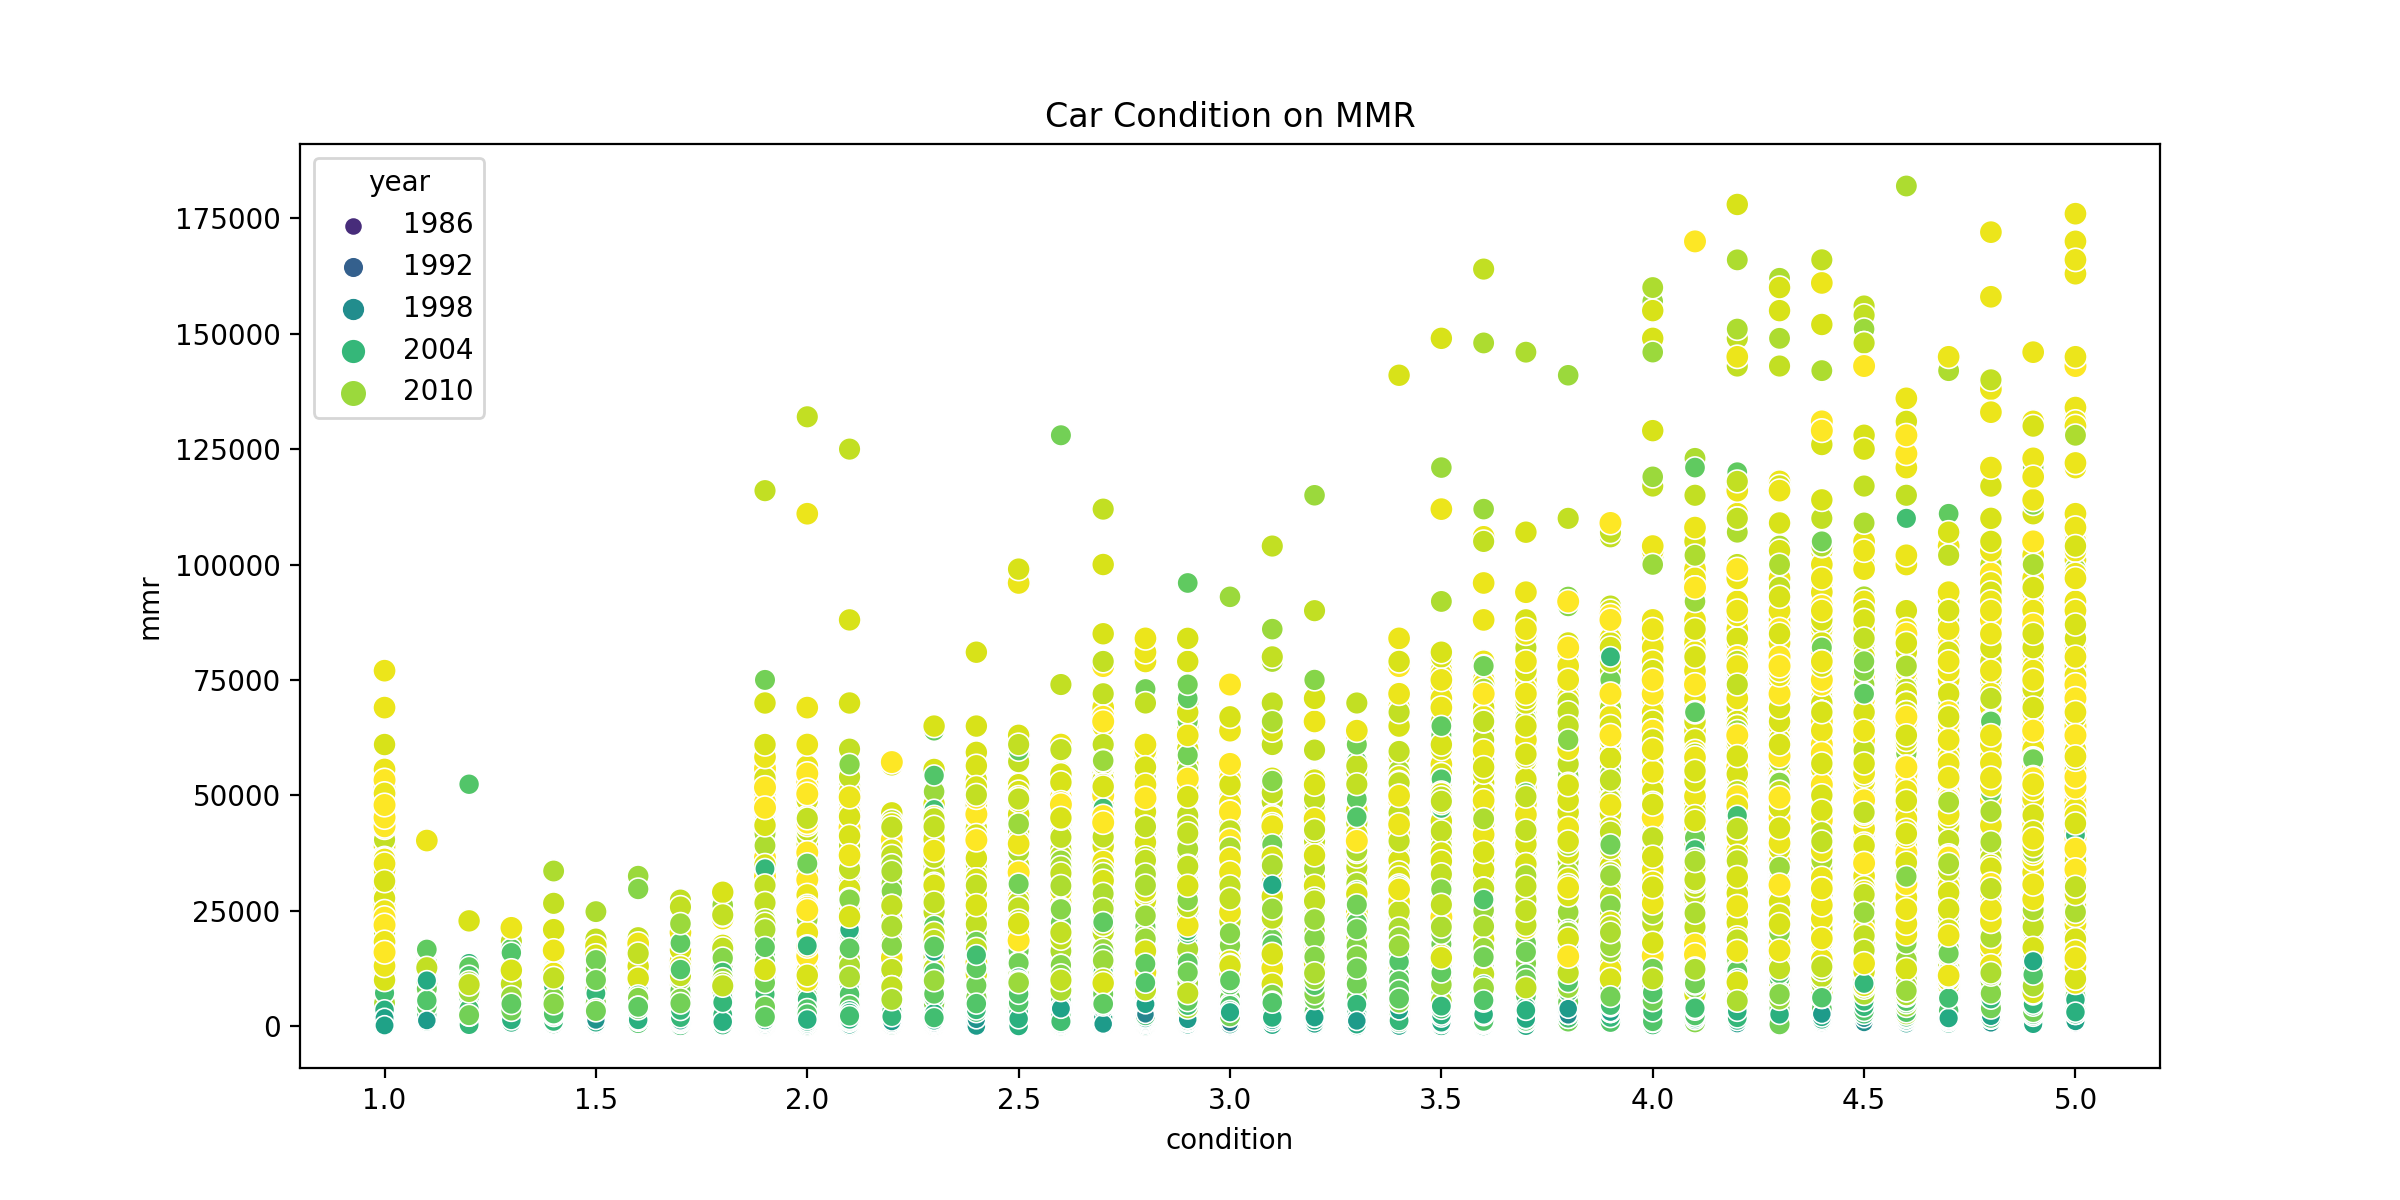

In [28]:
# Visualisasi Harga Jual Terhadap Kondisi Mobil 

plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(data=dfcar, x='condition', y='mmr', hue='year', size= 'year', palette='viridis')
plt.title('Car Condition on MMR')
plt.show()

Dari grafik diatas dapat disimpulkan bahwa pada setiap rentang kondisi mobil dengan mmr yang relatif rendah, terdapat mobil keluaran tahun 2004 keatas. Hal itu bisa mengindikasikan bahwa banyak mobil keluaran tahun 2004 yang dijual bekas. 
Selain itu, produksi mobil sejak 2010 mengalami kenaikan pada kondisi nya dan mmr yang semakin tinggi pula. Hal tersebut menunjukkan bahwa mmr memiliki pengaruh kuat terhadap bagus nya kondisi dan tahun produksi mobil.  

**Korelasi State Terhadap MMR**

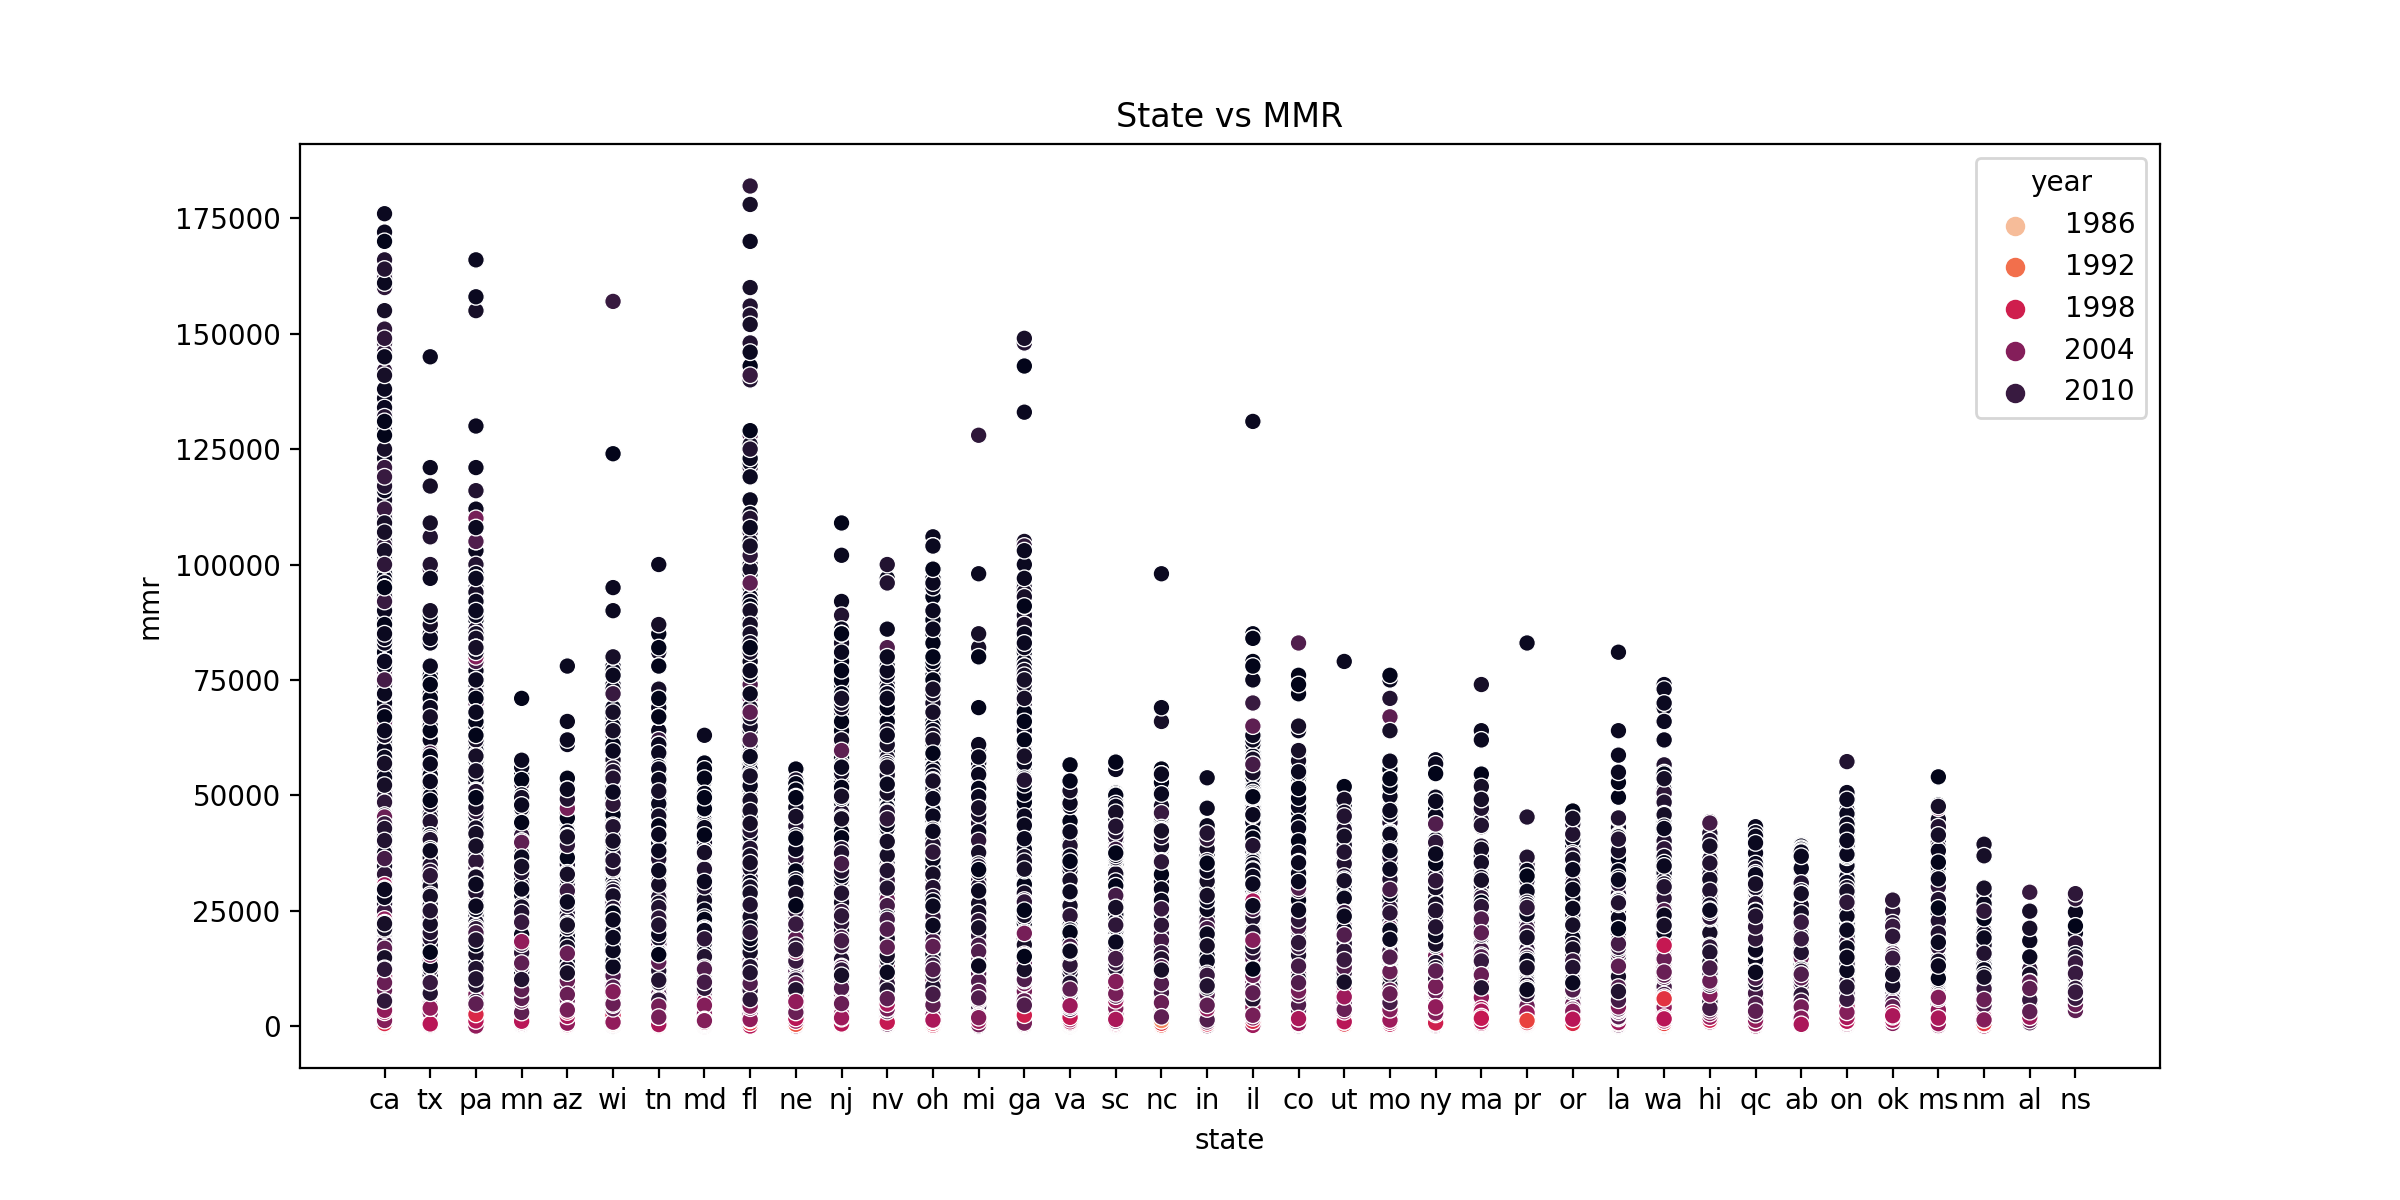

In [29]:
# Visualisasi State terhadap Jumlah Mobil

plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(data=dfcar, x='state', y='mmr', hue='year', palette='rocket_r')
plt.title('State vs MMR')
plt.show()

Jika dilihat dari hasil visualisasi diatas, terlihat bahwa pembelian mobil terbanyak berasal dari Florida, lalu California, Pennysilvania, dan Ohio. Di state manapun di US, semakin baru tahun produksi mobil maka mmr juga semakin tinggi. Namun, tidak sedikit juga mobil yang diproduksi pada tahun 2004 yang memiliki mmr yang tinggi.  
Selain itu, terlihat juga beberapa outlier mmr yang berasal dari beberapa state.

## BUSINESS INSIGHT AND VISUALIZATION

Pada section ini, kami mencoba menggali insight bisnis dan memvisualisasikannya. Kami akan menggunakan dataset copy sebagai pembeda dalam proses pemodelan. Beberapa insight bisnis yang kami coba gali adalah :  
**1. Bagaimana persentase penjualan**  
    Seperti analisis di awal memulai project, kami sempat mengatakan bahwa secara perhitungan sederhana terdapat sekitar 51% mobil terjual dengann harga dibawah MMR, dimana MMR merupakan harga acuan dalam dunia penjualan mobil bekas. Selanjutnya kami akan mencoba melakukan perhitungan kembali.  
    
**2. Rata-rata Sales Dalam Periode Bulanan dan Harian**  
    Lebih lanjut kami melihat bagaimana rata-rata sales dalam periode bulanan dan harian jika ditinjau dari acuan harga MMR. Hal ini bertujuan untuk mengetahui kapan terjadinya penjualan yang dibawah atau diatas harga MMR.  
    
**3. Jumlah Transaksi Bulanan, Harian, dan Jam**  
    Jumlah transaksi ini digunakan untuk mengetahui bagaimana customer behaviour jika ditinjau dari kapan mereka membeli mobil. Kita bisa mengetahui juga kapan memanfaatkan momentum untuk melakukan marketing ataupun meningkatkan strategi penjualan.  
    
**4. Mobil-mobil yang Dijual Dengan Harga Dibawah MMR**  
    Semakin mengerucut, akhirnya kita bisa melihat mobil-mobil apa saja yang paling banyak dijual dengan harga jual dibawah MMR. Ini akan semakin memudahkan tim bisnis dalam memperhitungkan strategi penjualan.

### 1. Persentase Penjualan

Pertama kami akan menggunakan dataset copy untuk memisahkan penggalian insight dan pemodelan. Selanjutnya kami memisahkan fitur 'saledate' ke dalam beberapa spesific time, lalu akan mengkategorikan beberapa value pada fitur kategorikal untuk mempermudah proses perhitungan.

In [30]:
# Meng-copy dataset
copy = dfcar.copy()

# Kolom 'is_sold_below_mmr'
## Kolom yang berisi apakah mobil terjual dibawah MMR atau tidak (1=Ya, 0=Tidak)
copy['is_sold_below_mmr'] = copy.apply(lambda x: 1 if x.sellingprice < x.mmr else 0, axis=1)

# Menghitung persentase penjualan
transaction = copy.groupby('is_sold_below_mmr').agg({'vin':'count'}).rename({'vin':'total_transaction'}, axis=1)
transaction['percentage'] = round(((transaction/transaction.sum())*100), 2)
transaction

,total_transaction,percentage
is_sold_below_mmr,,
0,272386,48.740
1,286425,51.260


In [31]:
transaction.reset_index(inplace=True)
persentase_bawah_mmr = transaction[transaction['is_sold_below_mmr']==1].percentage
print(f'\nPersentase penjualan dibawah MMR sebesar: {persentase_bawah_mmr[1]}%\n')


Persentase penjualan dibawah MMR sebesar: 51.26%



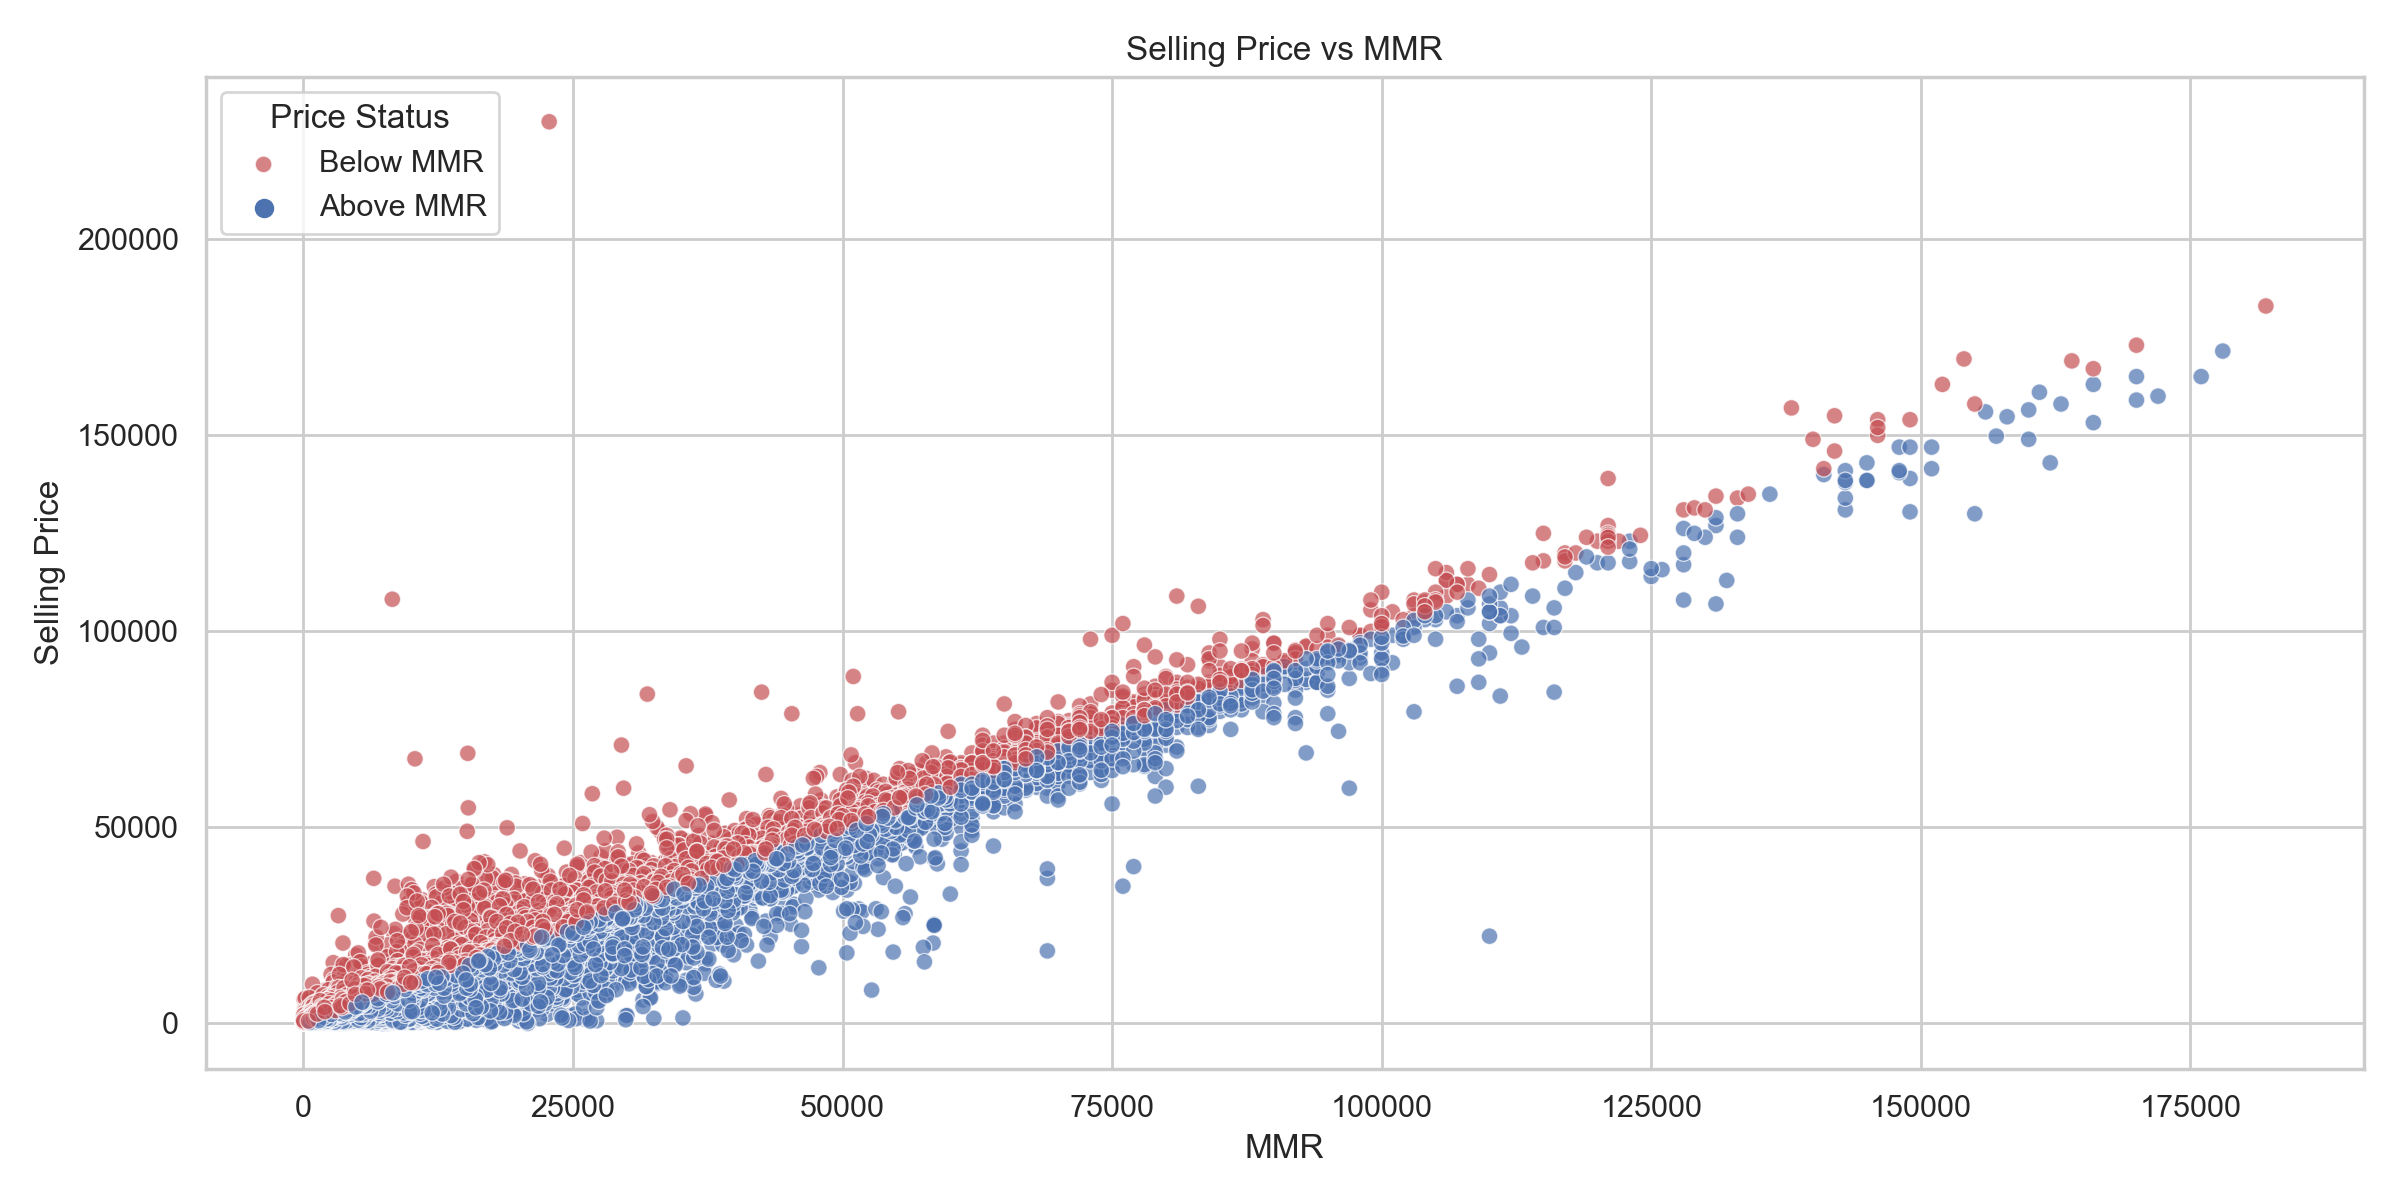

In [32]:
# Visualisasi 
copy['Price_Status'] = copy['sellingprice'] > copy['mmr']  # Kolom baru untuk menandai harga di atas atau di bawah MMR
sns.set(style='whitegrid')

# Membuat scatter plot menggunakan Seaborn dengan pewarnaan berdasarkan 'Price_Status'
plt.figure(figsize=(12, 6))
sns.scatterplot(data=copy, x='mmr', y='sellingprice', hue='Price_Status', palette={True: 'r', False: 'b'}, alpha=0.7)
plt.xlabel('MMR')
plt.ylabel('Selling Price')
plt.title('Selling Price vs MMR')

# Menampilkan scatter plot dengan legenda
plt.legend(title='Price Status', loc='upper left', labels=['Below MMR', 'Above MMR'])

# Menampilkan scatter plot
plt.tight_layout()
plt.show()

### 2. Rata-rata Sales Terhadap MMR

**Memisahkan Date Menjadi Lebih Spesifik**

In [33]:
timeget = []
for i in copy['saledate'].str.split():
    time_split = i[:5]
    date_string = ' '.join(time_split)
    timeget.append(date_string)
copy['datetime'] =  pd.to_datetime(timeget)

In [35]:
# Mengubah tipe data object ke datetime
copy['datetime'] =  pd.to_datetime(timeget)

copy['hour'] = copy['datetime'].apply(lambda time: time.strftime('%H:%M:%S'))
copy['month'] = copy['datetime'].apply(lambda time: time.month)
copy['day of week'] = copy['datetime'].apply(lambda time: time.dayofweek)

In [36]:
# Mapping spesific day of week
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
copy['day of week'] = copy['day of week'].map(dmap)
copy.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,...,seller,mmr,sellingprice,saledate,is_sold_below_mmr,Price_Status,datetime,hour,month,day of week
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.000,16639.000,...,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),0,True,2014-12-16 12:30:00,12:30:00,12,Tue
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.000,9393.000,...,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),0,True,2014-12-16 12:30:00,12:30:00,12,Tue
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.500,1331.000,...,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),1,False,2015-01-15 04:30:00,04:30:00,1,Thu
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.100,14282.000,...,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),0,True,2015-01-29 04:30:00,04:30:00,1,Thu
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.300,2641.000,...,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),0,True,2014-12-18 12:30:00,12:30:00,12,Thu


Dataset copy sudah memiliki 5 kolom tambahan, yaitu 'is_sold_below_mmr', 'datetime', 'hour', 'month', 'day of week'.

In [37]:
# Pembuatan beberapa kolom yang berkaitan dengan waktu:
## Kolom 'hour_only', khusus hanya mengeluarkan jam (kolom 'hour' bernilai jam:menit:detik)
copy['hour_only'] = copy['datetime'].dt.hour

## Membuat kolom 'month_year', khusus hanya bulan dan tanggal, tanpa jam (kolom 'datetime' bernilai tanggal dan jam)
copy['month_year'] = copy.datetime.dt.strftime('%b-%y')

## Membuat kolom 'date', khusus hanya tahun-bulan-tanggal, tanpa jam (kolom 'datetime' bernilai tanggal dan jam)
copy['date'] = copy['datetime'].dt.date
copy['date'] = pd.to_datetime(copy['date'], format = '%Y-%m-%d')

**Bulanan**

Kita akan melihat bagaimana rata-rata penjualan terhadap MMR dalam periode bulanan. Data yang disajikan hanyalah sebagian sampel dari jangka waktu yang ada. Disini kami mengambil tiap quarter dari tahun 2012-2015 dimana dari hasil EDA sebelumnya terlihat bahwa banyak penjualan terjadi di tahun-tahun tersebut.

In [38]:
# Melakukan grouping berdasarkan kolom 'month_year'
monthly_sale_summary = copy.groupby(['month_year']).agg({'vin' : 'count', 'mmr' : ['sum', 'mean'], 'sellingprice' : ['sum', 'mean'] }).reset_index()
monthly_sale_summary.columns = ['date', 'total_transaction', 'mmr_sum', 'mmr_avg', 'selling_sum', 'selling_avg']

# Sorting Date secara manual
custom_dict = {'Jan-14':0, 'Feb-14':1, 'Dec-14':2, 'Jan-15':3, 'Feb-15':4, 'Mar-15':5, 'Apr-15':6, 'May-15':7, 'Jun-15':8, 'Jul-15':9}
monthly_sale_summary = monthly_sale_summary.sort_values(by=['date'], key=lambda x: x.map(custom_dict))

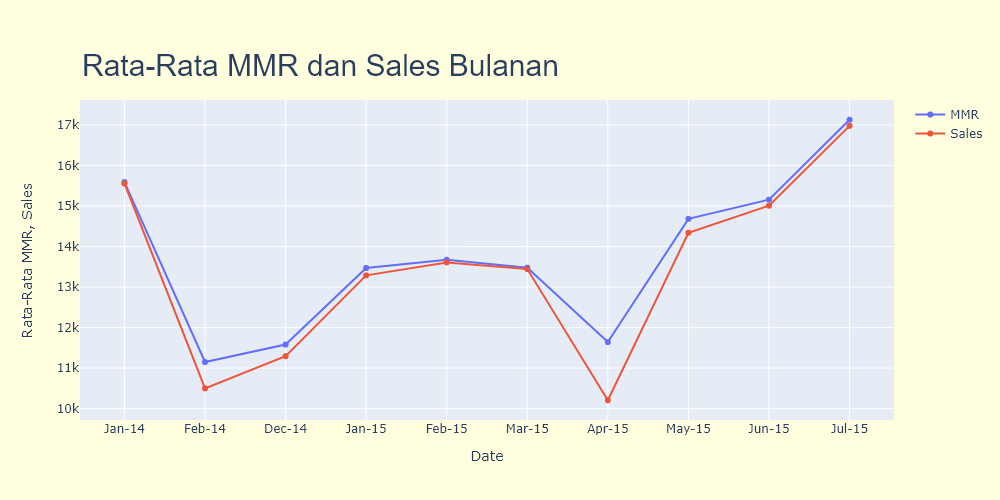

In [39]:
# Visualisasi Rata-rata Sales dan MMR Periode Bulanan 
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=monthly_sale_summary.date,
    y=monthly_sale_summary.mmr_avg,
    name='MMR'
))
fig.add_trace(go.Scatter(
    x=monthly_sale_summary.date,
    y=monthly_sale_summary.selling_avg,
    name='Sales'
))

annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Rata-Rata MMR dan Sales Bulanan',
                              font=dict(family='Arial',
                                        size=30),
                              showarrow=False))
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    paper_bgcolor="LightYellow",
    annotations=annotations
)

# Set axis title
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Rata-Rata MMR, Sales")

fig.show('png')

Jumlah rata – rata sales di setiap bulannya selalu lebih rendah daripada nilai MMR-nya.

**Harian**

In [40]:
# Melakukan grouping berdasarkan kolom 'date'
daily_sale_summary = copy.groupby('date').agg({'vin' : 'count', 'mmr' : ['sum', 'mean'], 'sellingprice' : ['sum', 'mean'] }).reset_index()
daily_sale_summary.columns = ['date', 'total_transaction', 'mmr_sum', 'mmr_avg', 'selling_sum', 'selling_avg']

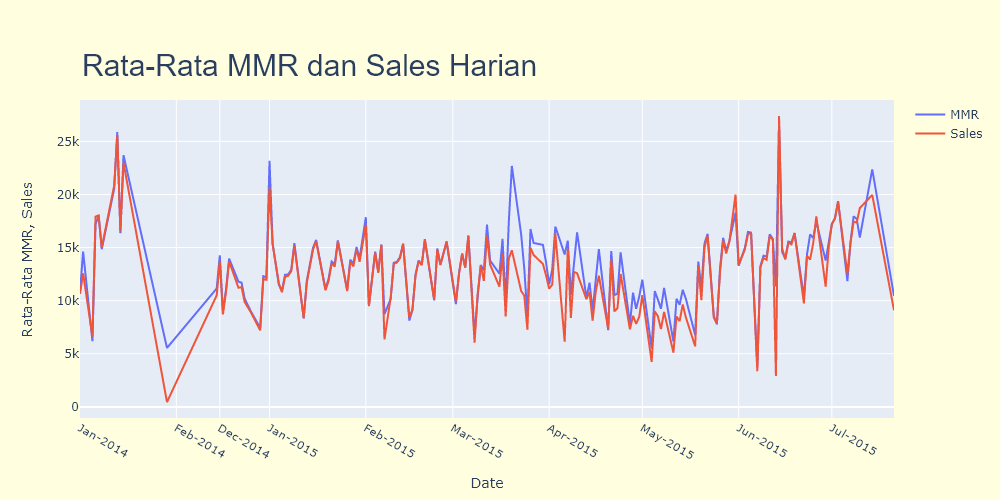

In [41]:
# Visualisasi Rata-rata Sales dan MMR Periode Harian

dt_breaks = pd.date_range(start='2014-02-15', end='2014-12-15', freq='D')
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=daily_sale_summary.date,
    y=daily_sale_summary.mmr_avg,
    name='MMR'
))

fig.add_trace(go.Scatter(
    x=daily_sale_summary.date,
    y=daily_sale_summary.selling_avg,
    name='Sales'
))
annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Rata-Rata MMR dan Sales Harian',
                              font=dict(family='Arial',
                                        size=30),
                              showarrow=False))
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    paper_bgcolor="LightYellow",
    annotations=annotations
)

# Set axis title
fig.update_xaxes(title_text="Date", rangebreaks=[dict(values=dt_breaks)], tickformat = '%b-%Y', dtick='M1')
fig.update_yaxes(title_text="Rata-Rata MMR, Sales")

fig.show('png')

Dari plot harian ini lebih dapat terlihat bahwa terdapat beberapa titik dimana penjualan mobil sama atau bahkan lebih tinggi dari pada MMR dibanding bila dilihat dari plot bulanan.

### 3. Jumlah Transaksi

**Jumlah Transaksi Bulanan**

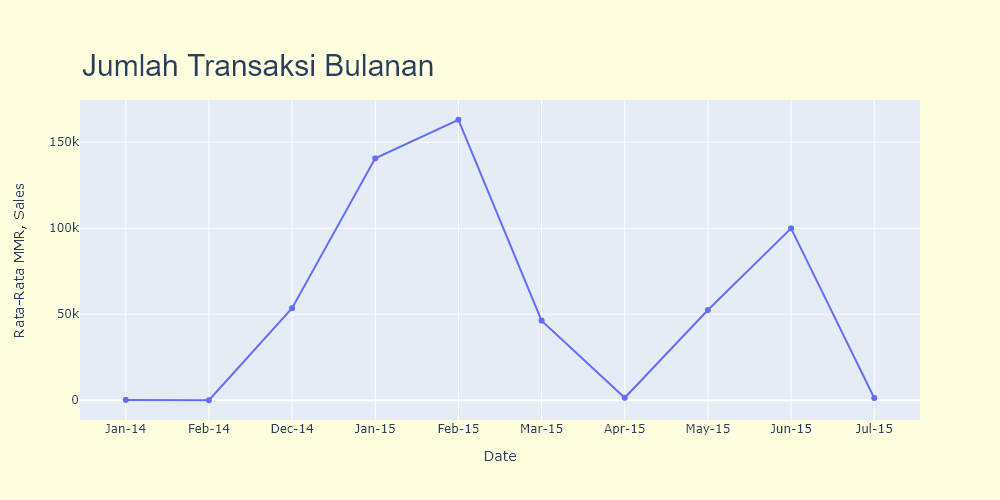

In [42]:
# Visualisasi Jumlah Transaksi Periode Bulanan
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=monthly_sale_summary.date,
    y=monthly_sale_summary.total_transaction,
    name='MMR'
))
annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Jumlah Transaksi Bulanan',
                              font=dict(family='Arial',
                                        size=30),
                              showarrow=False))
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    paper_bgcolor="LightYellow",
    annotations=annotations
)

# Set axis title
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Rata-Rata MMR, Sales")

fig.show('png')

Puncak transaksi terjadi pada Feb-2015 (Sekitar 160rb Transaksi), setelahnya terjadi penurunan transaksi hingga Apr-2015 dan kembali naik hingga Jun-2015.

**Jumlah Transaksi Berdasarkan Hari dan Jam**

In [43]:
# Visualisasi Transaksi Harian dan Jam
week_hour = copy.pivot_table(index='day of week',columns='hour_only',values='vin',aggfunc='count')
week_hour = week_hour.reindex(index=['Mon','Tue', 'Wed','Thu', 'Fri', 'Sat', 'Sun'])
week_hour = week_hour.fillna(0)

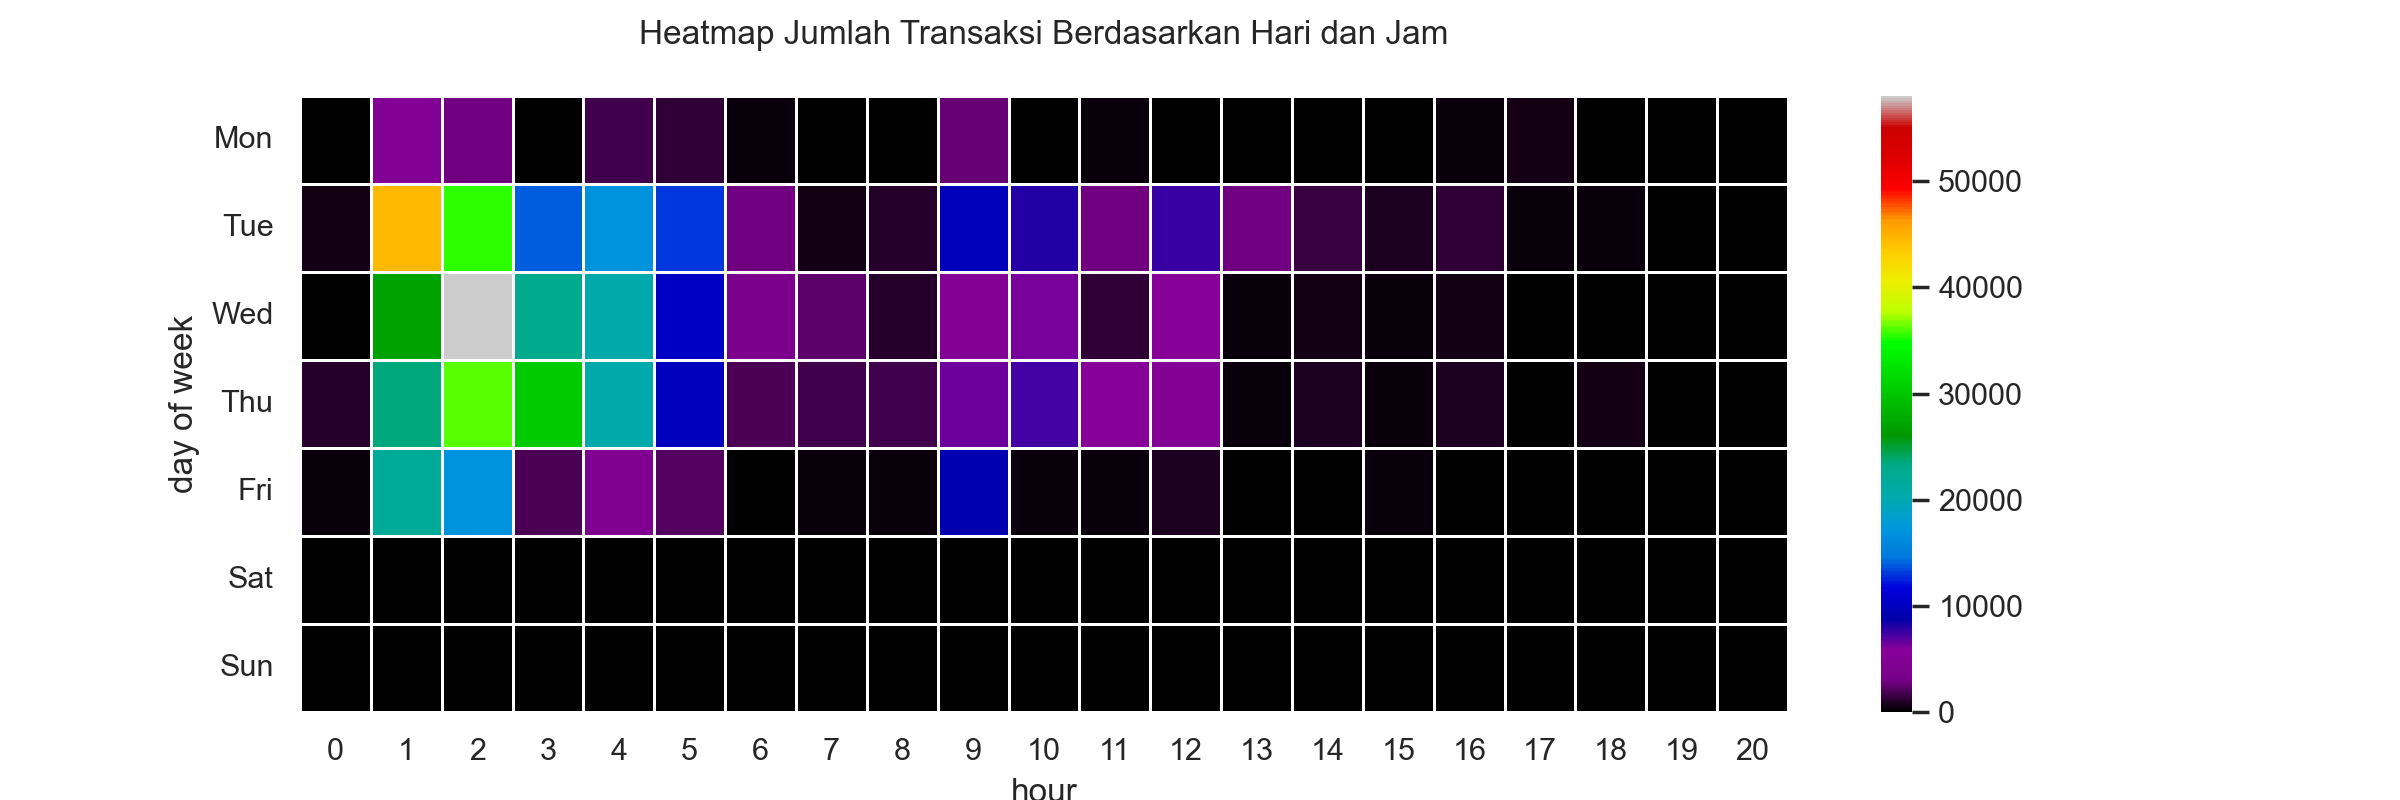

In [44]:
f, ax = plt.subplots(figsize=(12, 4))
sns.heatmap(week_hour, cmap='nipy_spectral', annot=False, fmt="2f", linewidths=.5, ax=ax)
plt.title('Heatmap Jumlah Transaksi Berdasarkan Hari dan Jam\n')
plt.xlabel('hour')
plt.yticks(rotation=0)
plt.show()

Dari plot diatas, diperoleh informasi bahwa:

Transaksi lebih banyak dilakukan pada saat Weekdays  
Transaksi tergolong tinggi pada jam 1 – 5 dan 9 – 12  
Peak Transaksi terjadi pada saat jam 1 - 3

### 4. Penjualan Mobil Dibawah MMR

**Pengaruh Harga Jual dengan MMR Berdasarkan Kondisi**

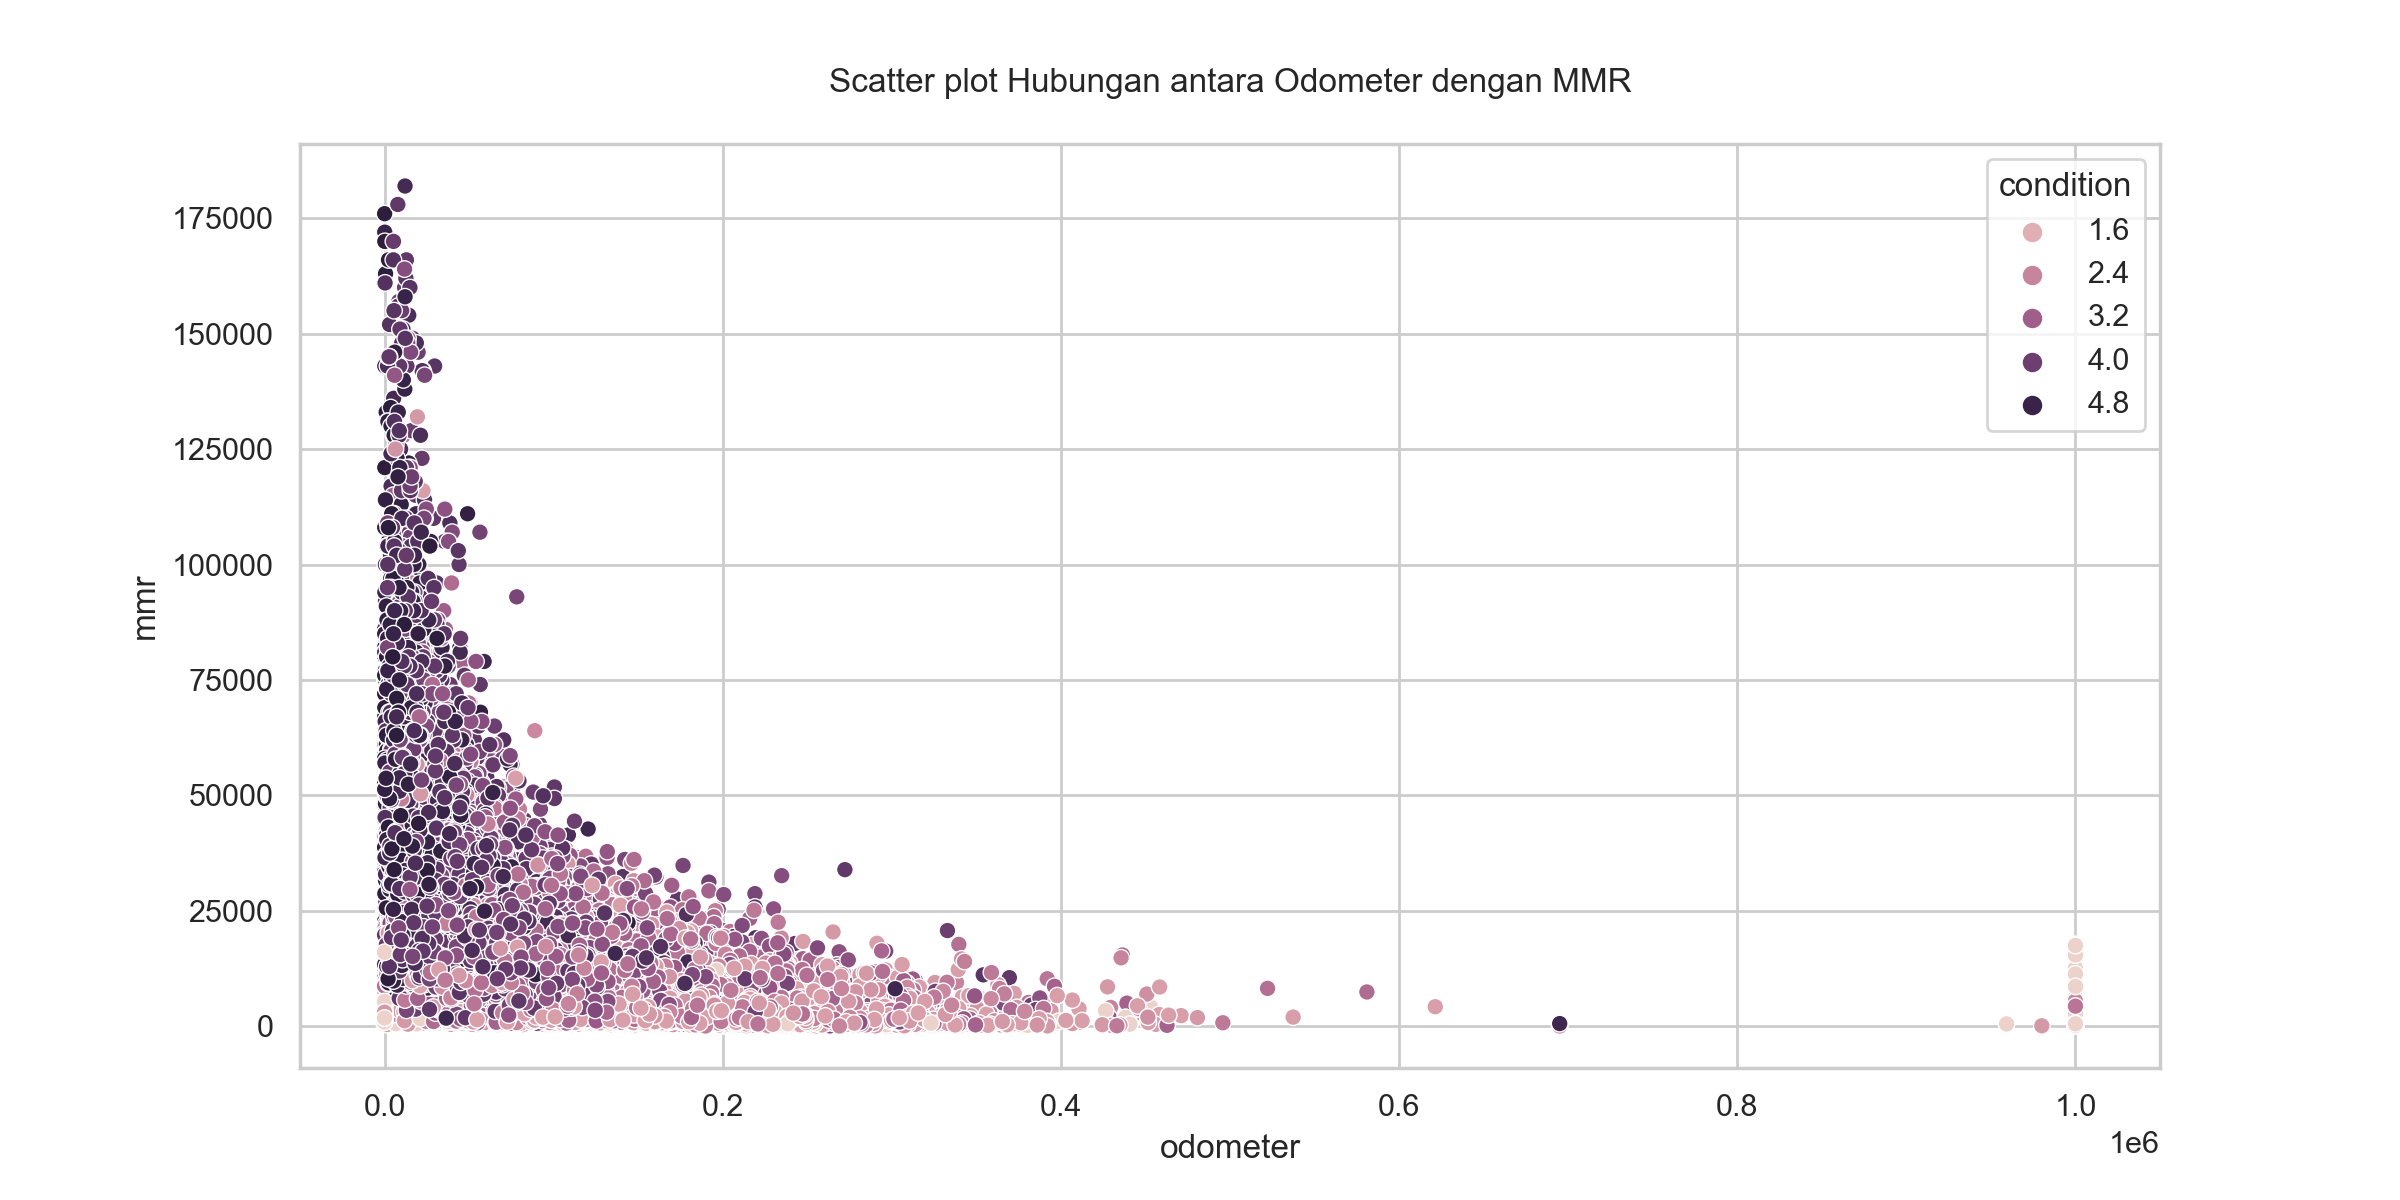

In [45]:
# Visualisasi Pengaruh Odometer Terhadap MMR Berdasarkan Kondisi
plt.figure(figsize=(12,6))
sns.scatterplot(data=copy, x='odometer', y='mmr', hue='condition')
plt.title('Scatter plot Hubungan antara Odometer dengan MMR\n')
plt.show()

Dapat terlihat bahwa harga mmr dipengaruhi oleh kondisi mobil yang baik (ditunjukkan oleh angka 3 ke atas) dengan nilai odometer yang kecil (hingga rentang 20k). Namun, kita juga bisa melihat ternyata masih terhitung banyak kondisi mobil yang dikatakan kurang baik.

**Mobil Yang Banyak Dijual Dibawah Harga MMR**

In [46]:
# Melakukan Grouping model
model_mmr = copy.groupby(['model', 'make', 'is_sold_below_mmr']).agg({'vin' : 'count'}).rename({'vin' : 'total_sold'}, axis=1)
model_mmr['percentage'] = round((model_mmr/(model_mmr.groupby(level=0).sum())*100), 2)
model_mmr.reset_index(inplace=True)
model_mmr

,model,make,is_sold_below_mmr,total_sold,percentage
0,1,bmw,0,1,100.000
1,1 Series,BMW,0,204,50.370
2,1 Series,BMW,1,201,49.630
3,1500,Ram,0,1649,50.270
4,1500,Ram,1,1577,48.080
...,...,...,...,...,...
1895,xD,Scion,1,94,54.650
1896,yaris,toyota,0,1,25.000
1897,yaris,toyota,1,3,75.000
1898,yukon,gmc,0,1,33.330


In [47]:
model_mmr['total_sold'].describe()

count    1900.000
mean      288.638
std       798.026
min         1.000
25%         5.000
50%        31.000
75%       175.000
max     10052.000
Name: total_sold, dtype: float64

--  
Dari hasil statistik diatas, kita bisa menggunakan kriteria-kriteria tertentu untuk mengkategorikan bagaimana model mobil bisa memberikan 'dampak' kerugian terhadap pendapatan.  
Beberapa kriteria yang dipakai (salah satu) diantaranya:

Persentase penjualan dibawah MMR >= 50% dan Jumlah unit terjual dibawah MMR >= 31 (nilai median)  
Persentase penjualan dibawah MMR >= 75% dan Jumlah unit terjual dibawah MMR >= 15 (nilai q3 dan setengah nilai median)

In [48]:
# Filtering berdasarkan kriteria
unrecomended_model = model_mmr[((model_mmr['is_sold_below_mmr']==1) & (model_mmr['percentage']> 50) & (model_mmr['total_sold']>=31)) |
                               ((model_mmr['is_sold_below_mmr']==1) & (model_mmr['percentage']> 75) & (model_mmr['total_sold']>=15))].sort_values('total_sold', ascending=False)
unrecomended_model.reset_index(drop='index', inplace=True)
unrecomended_model.head(5)

,model,make,is_sold_below_mmr,total_sold,percentage
0,Altima,Nissan,1,10052,51.950
1,F-150,Ford,1,7415,51.210
2,Fusion,Ford,1,6863,53.010
3,Camry,Toyota,1,6721,53.580
4,Escape,Ford,1,6106,51.480


In [49]:
print(f'\nJumlah Model: {unrecomended_model.model.nunique()}\n\n')


Jumlah Model: 289




Dari 1900 jumlah mobil yang terjual dibawah MMR, terdapat sebanyak 289 model mobil yang terjual dibawah MMR dengan kriteria yang telah ditetapkan.  
**Berikut List Model Mobil Beserta Merk yang memiliki penjualan dibawah MMR yang Cukup Tinggi:**

In [50]:
unrecomended_model[['make', 'model']].sort_values(['make', 'model']).reset_index(drop='index')

,make,model
0,Acura,CL
1,Audi,Q7
2,BMW,3 Series
3,BMW,5 Series
4,BMW,5 Series Gran Turismo
...,...,...
284,honda,pilot
285,jeep,wrangler
286,lexus,gx
287,smart,fortwo
